Chapter 20

# 沃罗诺伊图
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
# generate data/speed values
points = np.random.uniform(size=[30, 2])
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
speed = np.random.uniform(low=0.0, high=5.0, size=50)

In [3]:
# generate Voronoi tessellation
vor = Voronoi(points)

In [4]:
# find min/max values for normalization
minima = min(speed)
maxima = max(speed)

In [5]:
# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

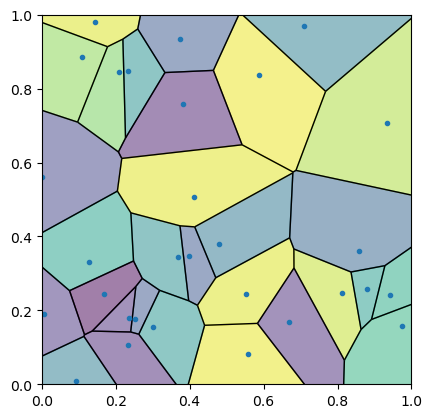

In [6]:
fig, ax = plt.subplots()

# plot Voronoi diagram, and fill finite regions with color mapped from speed value
voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1, ax = ax)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]), alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()